In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2450,ham,K..give back my thanks.,NaN,NaN,NaN
5207,ham,"Babe, I'm answering you, can't you see me ? Ma...",NaN,NaN,NaN
4106,spam,HOT LIVE FANTASIES call now 08707500020 Just 2...,NaN,NaN,NaN
3007,spam,"Loan for any purpose å£500 - å£75,000. Homeown...",NaN,NaN,NaN
1397,ham,Then we wait 4 u lor... No need 2 feel bad lar...,NaN,NaN,NaN


In [4]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvements
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#renaming the colms
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target']=encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# check_for_duplicate_values
df['text'].duplicated().sum()

np.int64(403)

In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
df['text'].duplicated().sum()

np.int64(0)

In [16]:
df.shape

(5169, 2)

## 2. EDA

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
 df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

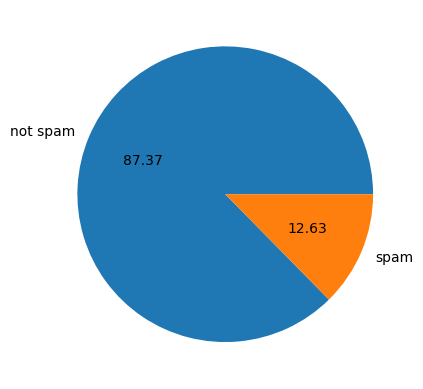

In [19]:
import matplotlib.pyplot as plt
plt.pie( df['target'].value_counts(), labels=['not spam','spam'], autopct='%.2f')
plt.show()

In [20]:
# Data is Imbalanced

In [21]:
!pip install nltk


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [22]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rahulchoudhary/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/rahulchoudhary/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [23]:
df['num_characters'] = df['text'].apply(len)

In [24]:
df.sample(5)

,target,text,num_characters
1634,1,"Eerie Nokia tones 4u, rply TONE TITLE to 8007 ...",161
4135,0,have you ever had one foot before?,34
5518,0,"By the way, i've put a skip right outside the ...",122
5323,0,Aah bless! How's your arm?,26
2308,1,Moby Pub Quiz.Win a å£100 High Street prize if...,162


In [25]:
# num of words
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(str(x))))

In [26]:
df.sample(5)

,target,text,num_characters,num_words
1165,0,"Haha yeah I see that now, be there in a sec",43,12
3878,0,She left it very vague. She just said she woul...,257,54
3610,0,No. I.ll meet you in the library,32,8
180,0,You lifted my hopes with the offer of money. I...,159,34
4057,0,Hi di is yijue we're meeting at 7 pm at esapla...,59,14


In [27]:
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(str(x))))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
## Ham

df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
## Spam

df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

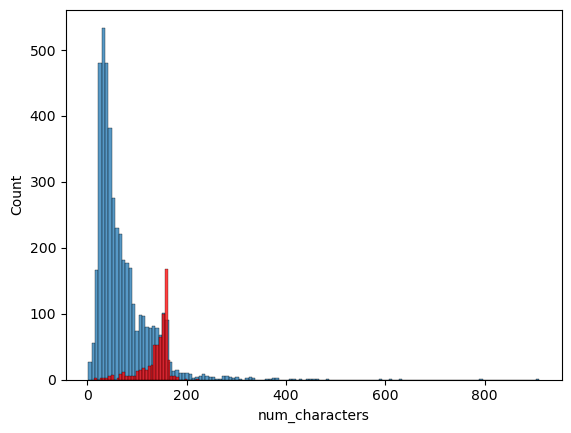

In [32]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

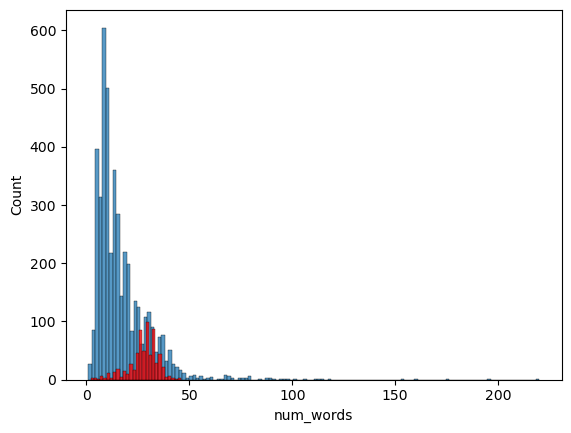

In [33]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

<Axes: >

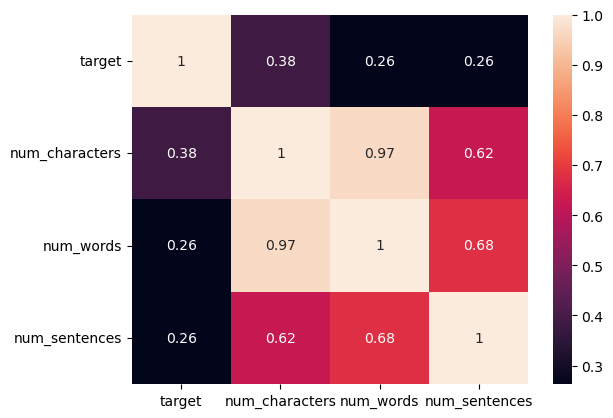

In [34]:
# Option 1: Calculate correlation only for numeric columns
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)

Since all three columns--> num_sentences, num_words, and num_characters have very high colinearty with each other. We will only keep one column while training, and it will be 'num_characters' because compare to others, it high highest relation with 'target' 0.38

## Data Preprocessing
* Lower Case
* Word Tokenization
* Removing Special Characters
* Removing stop words and puncuations
* Stemming

In [35]:
# Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Caring')

'care'

In [36]:
from nltk.corpus import stopwords
import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for s in text:
        if s.isalnum():
            y.append(s)
    text = y[:]
    y.clear()

    for s in text:
        if s not in stopwords.words('english') and s not in string.punctuation:
            y.append(s)
    text = y[:]
    y.clear()

    for s in text:
        y.append(ps.stem(s))
    return " ".join(y)

In [37]:
transform_text('Tomarrow final hearing on my laptop case so i cant.')

'tomarrow final hear laptop case cant'

In [38]:
df['transformed_text']=df['text'].apply(transform_text)

In [39]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
spam_vocab = []

for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_vocab.append(word)

In [41]:
len(spam_vocab)

9939

In [42]:
from collections import Counter
spam_word_counts = pd.DataFrame(Counter(spam_vocab).most_common(30), columns=['Word', 'Count'])
spam_word_counts

,Word,Count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


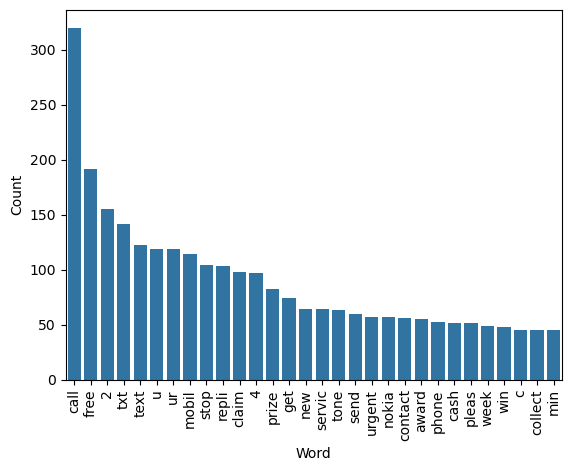

In [43]:
sns.barplot(data=spam_word_counts, x='Word', y='Count')
plt.xticks(rotation = 'vertical')[1]
plt.show()

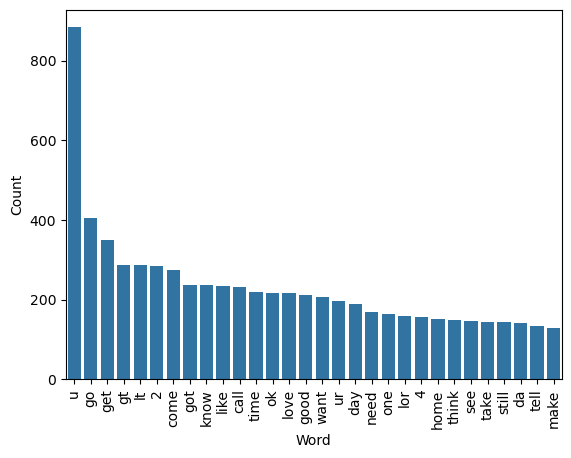

In [44]:
ham_vocab = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_vocab.append(word)

word_counts = pd.DataFrame(Counter(ham_vocab).most_common(30), columns=['Word', 'Count'])
sns.barplot(data=word_counts, x='Word', y='Count')
plt.xticks(rotation = 'vertical')[1]
plt.show()

## 4. Model Building

In [45]:
# For Textual data, we know that Naive Base models work better, so will go with that.

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [47]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [48]:
X.shape

(5169, 6708)

In [49]:
y= df['target']

In [50]:
y.shape

(5169,)

In [51]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [53]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [54]:
# Gaussian Naive Bayes
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
print("Confusion Metrix",confusion_matrix(y_test, y_pred1))
print("Accuracy of the model: ",accuracy)
print("Precision of the model: ",precision)

Confusion Metrix [[772 117]
 [ 24 121]]
Accuracy of the model:  0.8636363636363636
Precision of the model:  0.5084033613445378


In [55]:
# Multinomial Naive Bayes
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
print("Confusion Metrix",confusion_matrix(y_test, y_pred2))
print("Accuracy of the model: ",accuracy)
print("Precision of the model: ",precision)

Confusion Metrix [[888   1]
 [ 39 106]]
Accuracy of the model:  0.9613152804642167
Precision of the model:  0.9906542056074766


In [56]:
# Bernoulli Naive Bayes
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3)
print("Confusion Metrix",confusion_matrix(y_test, y_pred3))
print("Accuracy of the model: ",accuracy)
print("Precision of the model: ",precision)

Confusion Metrix [[885   4]
 [ 31 114]]
Accuracy of the model:  0.9661508704061895
Precision of the model:  0.9661016949152542


In [57]:
# As of now, Multinomial Naive Bayes giving the best Precision.
# Let's try one more model --> Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc =  RandomForestClassifier(n_estimators=50, random_state=2)

In [59]:
#Random Forest
rfc.fit(X_train, y_train)
y_pred4 = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred4)
precision = precision_score(y_test, y_pred4)
print("Confusion Metrix",confusion_matrix(y_test, y_pred4))
print("Accuracy of the model: ",accuracy)
print("Precision of the model: ",precision)

Confusion Metrix [[888   1]
 [ 30 115]]
Accuracy of the model:  0.9700193423597679
Precision of the model:  0.9913793103448276


Random Forest is working better than Naive Bayes, in both Precision and Accuracy

## 5. Improve the Model

Till now, in Tfidf, we set the max_features as default, means it was incliuding every word. Let's make it 3000

In [60]:
tfidf1 = TfidfVectorizer(max_features = 3000)

In [61]:
X = tfidf1.fit_transform(df['transformed_text']).toarray()
y= df['target']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [63]:
mnb_new = MultinomialNB()

In [64]:
# Multinomial Naive Bayes
mnb_new.fit(X_train, y_train)
y_pred2 = mnb_new.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
print("Confusion Metrix",confusion_matrix(y_test, y_pred2))
print("Accuracy of the model: ",accuracy)
print("Precision of the model: ",precision)

Confusion Metrix [[888   1]
 [ 27 118]]
Accuracy of the model:  0.9729206963249516
Precision of the model:  0.9915966386554622


In [65]:
#Random Forest
rfc_new =  RandomForestClassifier(n_estimators=50, random_state=2)
rfc_new.fit(X_train, y_train)
y_pred2 = rfc_new.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
print("Confusion Metrix",confusion_matrix(y_test, y_pred2))
print("Accuracy of the model: ",accuracy)
print("Precision of the model: ",precision)

Confusion Metrix [[886   3]
 [ 26 119]]
Accuracy of the model:  0.971953578336557
Precision of the model:  0.9754098360655737


As we can see, now Accuracy of Multinomial Naive Bayes is more than Random Forest, so as for now, we will use Multinomial Naive Bayes

In [66]:
# Let's add one more feature in input Column --> num_characters

In [67]:
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [68]:
X.shape

(5169, 3001)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [70]:
mnb2 = MultinomialNB()
rfc2 =  RandomForestClassifier(n_estimators=50, random_state=2)

In [71]:
# Multinomial Naive Bayes
mnb2.fit(X_train, y_train)
y_pred2 = mnb2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
print("Confusion Metrix",confusion_matrix(y_test, y_pred2))
print("Accuracy of the model: ",accuracy)
print("Precision of the model: ",precision)

Confusion Metrix [[888   1]
 [ 59  86]]
Accuracy of the model:  0.941972920696325
Precision of the model:  0.9885057471264368


In [72]:
#Random Forest
rfc2.fit(X_train, y_train)
y_pred2 = rfc2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
print("Confusion Metrix",confusion_matrix(y_test, y_pred2))
print("Accuracy of the model: ",accuracy)
print("Precision of the model: ",precision)

Confusion Metrix [[887   2]
 [ 27 118]]
Accuracy of the model:  0.971953578336557
Precision of the model:  0.9833333333333333


#### We could have also try Voting Classifier and Stacking, but itsn't giving any better result than 'mnb_new' model in precsion, so we will use, "mnb_new" as our final model

In [76]:
import pickle
pickle.dump(tfidf,open('Vectorizer.pkl','wb'))
pickle.dump(tfidf1,open('Vectorizer1.pkl','wb'))
# pickle.dump(mnb_new,open('multi_naive_bayes_model.pkl','wb'))

In [75]:
# pickle.dump(rfc,open('random_forest_model.pkl','wb'))